In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('podaci11.csv')

In [3]:
print(df.head())

  FORMATION DATE APPLICATION DATE  UNIT MIDDLE EXCHANGE RATE
0    31.12.2002.      01.01.2003.     1              61.5845
1    31.12.2002.      02.01.2003.     1              61.5845
2    31.12.2002.      03.01.2003.     1              61.5845
3    03.01.2003.      04.01.2003.     1              61.6615
4    03.01.2003.      05.01.2003.     1              61.6615


In [4]:
print(df.tail())

     FORMATION DATE APPLICATION DATE  UNIT MIDDLE EXCHANGE RATE
7665    27.12.2023.      27.12.2023.     1             117,1587
7666    28.12.2023.      28.12.2023.     1             117,1504
7667    29.12.2023.      29.12.2023.     1             117,1737
7668    29.12.2023.      30.12.2023.     1             117,1737
7669    29.12.2023.      31.12.2023.     1             117,1737


In [5]:
df['APPLICATION DATE'] = df['APPLICATION DATE'].str.strip()


In [6]:
df['APPLICATION DATE'] = pd.to_datetime(df['APPLICATION DATE'], format='%d.%m.%Y.', errors='coerce')

In [7]:
print(df.head())

  FORMATION DATE APPLICATION DATE  UNIT MIDDLE EXCHANGE RATE
0    31.12.2002.       2003-01-01     1              61.5845
1    31.12.2002.       2003-01-02     1              61.5845
2    31.12.2002.       2003-01-03     1              61.5845
3    03.01.2003.       2003-01-04     1              61.6615
4    03.01.2003.       2003-01-05     1              61.6615


In [8]:
# Uklanjanje kolona koje nisu potrebne
df = df.drop(columns=['FORMATION DATE', 'UNIT'])

In [9]:
print(df.head())

  APPLICATION DATE MIDDLE EXCHANGE RATE
0       2003-01-01              61.5845
1       2003-01-02              61.5845
2       2003-01-03              61.5845
3       2003-01-04              61.6615
4       2003-01-05              61.6615


In [10]:
df.isnull().sum()

APPLICATION DATE        0
MIDDLE EXCHANGE RATE    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
df['MIDDLE EXCHANGE RATE'] = df['MIDDLE EXCHANGE RATE'].str.replace(',', '.')  # Zamena decimalne tačke sa zarezom (ako postoji)
df['MIDDLE EXCHANGE RATE'] = pd.to_numeric(df['MIDDLE EXCHANGE RATE'], errors='coerce')  # Konvertovanje u numerički formatE

In [13]:
df.to_csv("sredjeni_kurs.csv", index=False)

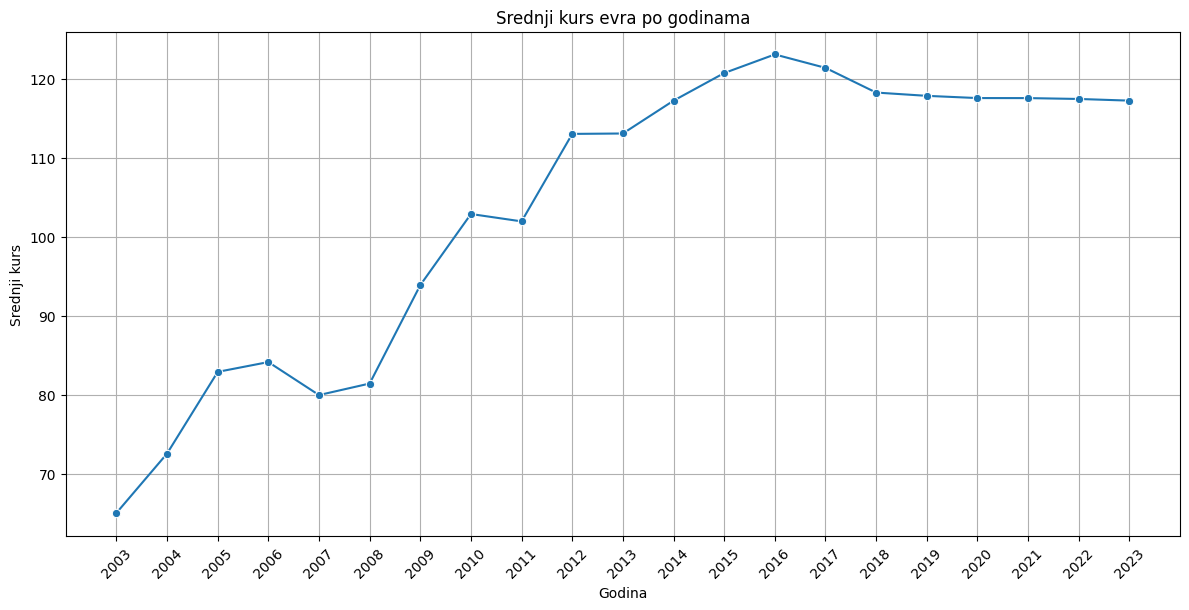

In [13]:
# Izdvajanje godine iz datuma
df['Year'] = df['APPLICATION DATE'].dt.year

# Grupisanje po godinama i izračunavanje srednjeg kursa
yearly_avg_exchange_rate = df.groupby('Year')['MIDDLE EXCHANGE RATE'].mean().reset_index()

# Vizualizacija
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_exchange_rate, x='Year', y='MIDDLE EXCHANGE RATE', marker='o')
plt.title('Srednji kurs evra po godinama')
plt.xlabel('Godina')
plt.ylabel('Srednji kurs')
plt.grid(True)
plt.tight_layout()
plt.xticks(yearly_avg_exchange_rate['Year'].astype(int), rotation=45) 
plt.show()


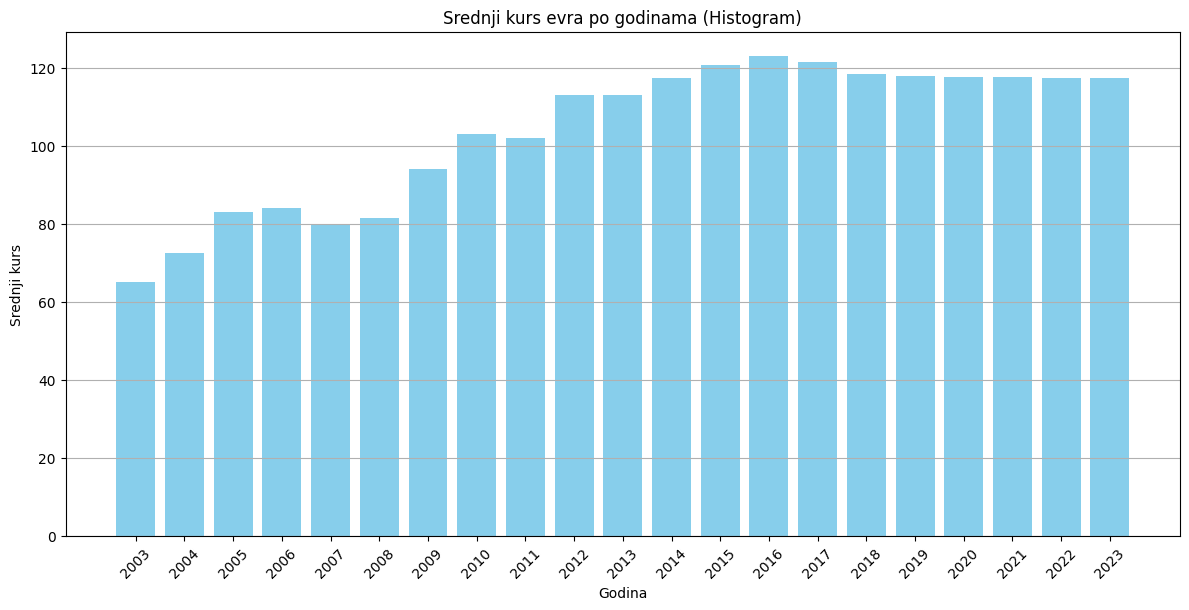

In [14]:
# Vizualizacija
plt.figure(figsize=(12, 6))
plt.bar(yearly_avg_exchange_rate['Year'], yearly_avg_exchange_rate['MIDDLE EXCHANGE RATE'], color='skyblue')
plt.title('Srednji kurs evra po godinama (Histogram)')
plt.xlabel('Godina')
plt.ylabel('Srednji kurs')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(yearly_avg_exchange_rate['Year'].astype(int), rotation=45) 
plt.show()

In [15]:
print(yearly_avg_exchange_rate) #Prosecne vrednosti kursa po godinama

    Year  MIDDLE EXCHANGE RATE
0   2003             65.051221
1   2004             72.573294
2   2005             82.914734
3   2006             84.155963
4   2007             79.977476
5   2008             81.438118
6   2009             93.899191
7   2010            102.899310
8   2011            101.965291
9   2012            113.041480
10  2013            113.092390
11  2014            117.247802
12  2015            120.744076
13  2016            123.101485
14  2017            121.402698
15  2018            118.275181
16  2019            117.859336
17  2020            117.578010
18  2021            117.573579
19  2022            117.464118
20  2023            117.252966


# Kretanje kursa po mesecima svake godine

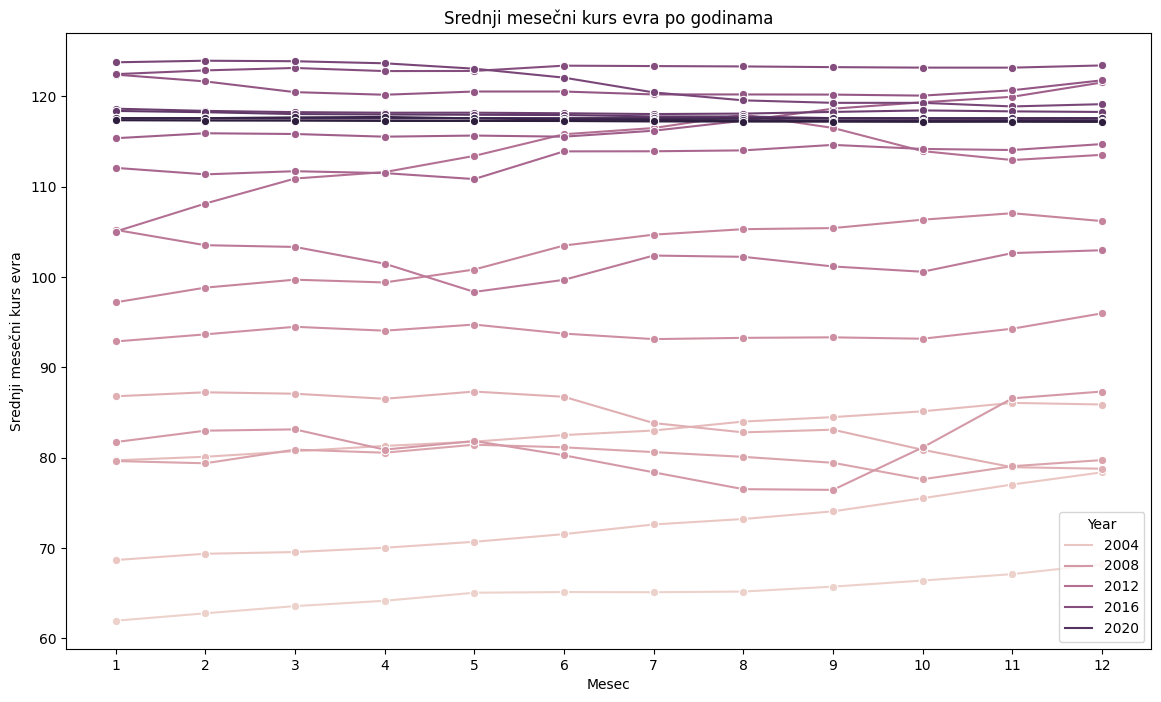

In [17]:
# Dodavanje kolone meseca u DataFrame
df['Month'] = df['APPLICATION DATE'].dt.month

# Grupisanje po godinama i mesecima i izračunavanje srednjeg kursa
yearly_monthly_avg_exchange_rate = df.groupby(['Year', 'Month'])['MIDDLE EXCHANGE RATE'].mean().reset_index()


plt.figure(figsize=(14, 8))
palette = sns.color_palette("tab20", n_colors=len(yearly_monthly_avg_exchange_rate['Year'].unique())*2)
sns.lineplot(data=yearly_monthly_avg_exchange_rate, x='Month', y='MIDDLE EXCHANGE RATE', hue='Year', marker='o')
plt.title('Srednji mesečni kurs evra po godinama')
plt.xlabel('Mesec')
plt.ylabel('Srednji mesečni kurs evra')
plt.xticks(range(1, 13)) 

# Prikazivanje grafikona
plt.show()


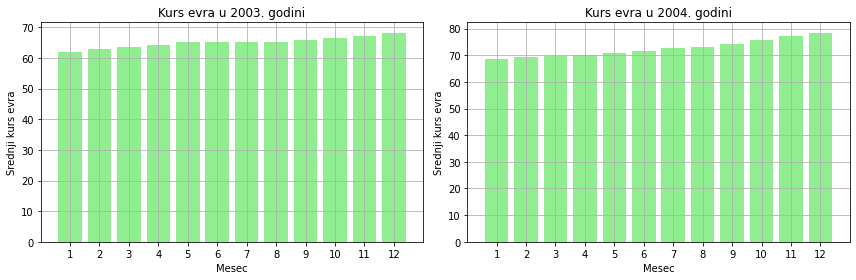

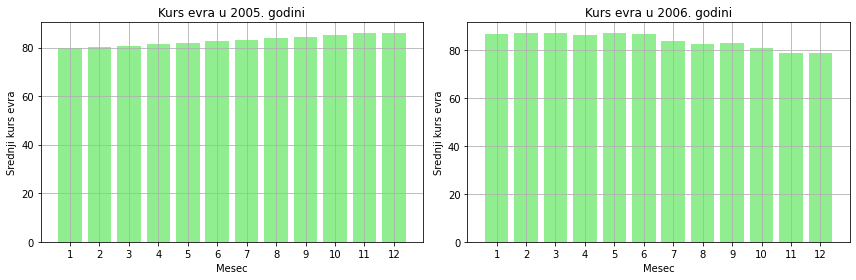

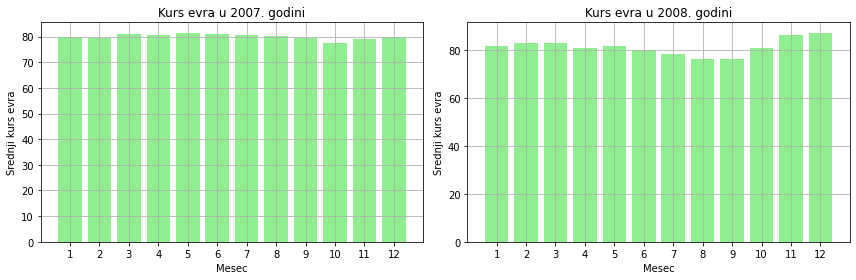

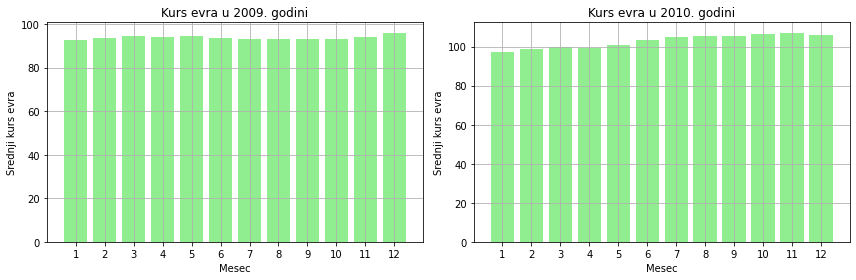

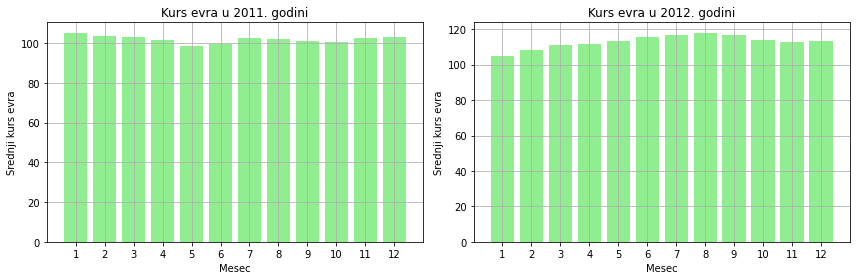

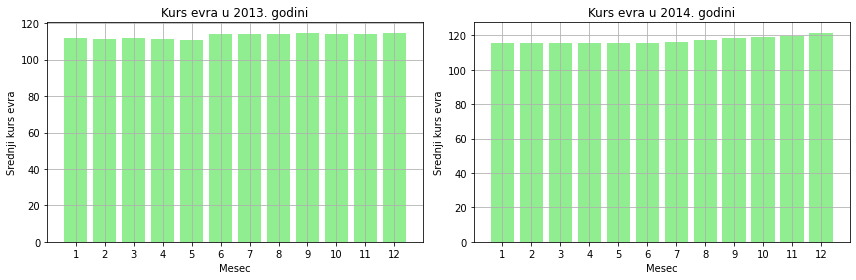

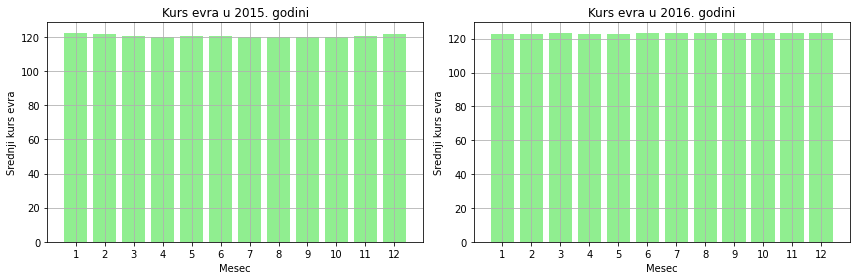

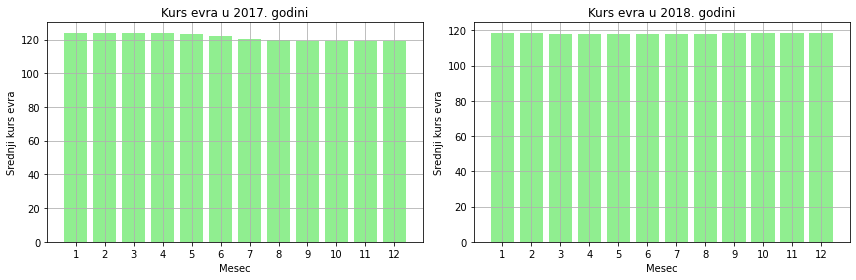

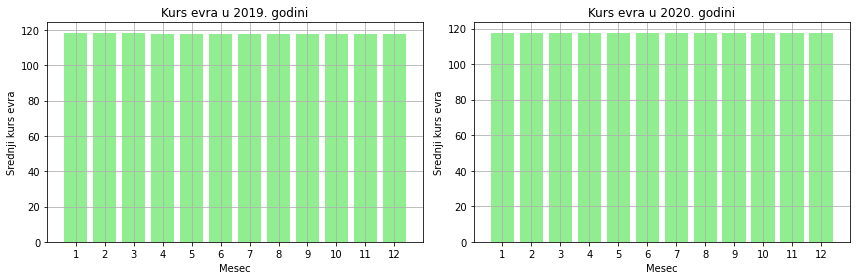

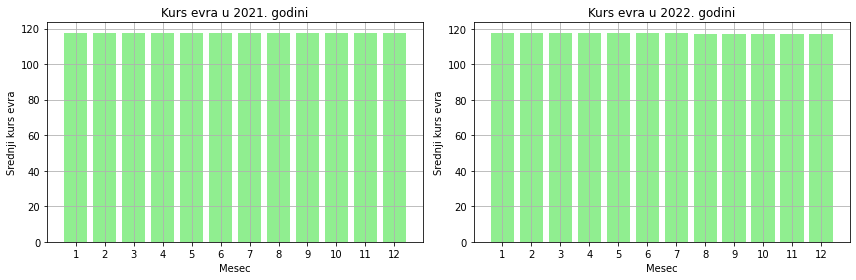

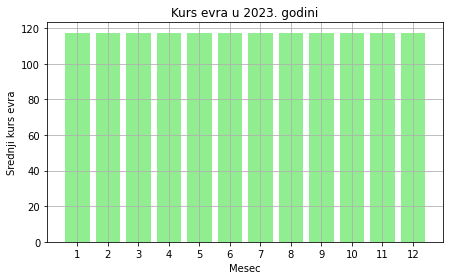

In [18]:
import matplotlib.pyplot as plt

# Izdvajanje godina
years = yearly_monthly_avg_exchange_rate['Year'].unique()

# Kreiranje histograma za svaku godinu
for i in range(0, len(years), 2):
    plt.figure(figsize=(12, 4))
    for j, year in enumerate(years[i:i+2]):
        data = yearly_monthly_avg_exchange_rate[yearly_monthly_avg_exchange_rate['Year'] == year]
        plt.subplot(1, 2, j+1)
        plt.bar(data['Month'], data['MIDDLE EXCHANGE RATE'], color='lightgreen')
        plt.title(f'Kurs evra u {year}. godini')
        plt.xlabel('Mesec')
        plt.ylabel('Srednji kurs evra')
        plt.xticks(range(1, 13))  # Postavljanje oznaka na x-osi za svaki mesec
        plt.grid(True)
    plt.tight_layout()
    plt.show()


In [22]:
df.head()

,APPLICATION DATE,MIDDLE EXCHANGE RATE,Year,Month
APPLICATION DATE,,,,
2003-01-01,2003-01-01,61.5845,2003,1
2003-01-02,2003-01-02,61.5845,2003,1
2003-01-03,2003-01-03,61.5845,2003,1
2003-01-04,2003-01-04,61.6615,2003,1
2003-01-05,2003-01-05,61.6615,2003,1


In [23]:
df.index

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='APPLICATION DATE', length=7670, freq=None)